In [46]:
# Import Packages
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load in features
features = pd.read_csv('/Users/ilanadeutsch/Desktop/features.csv')
erodedFeatures = pd.read_csv('/Users/ilanadeutsch/Desktop/featuresEroded.csv')

In [47]:
def bland_altman_plot(data1, data2, *args, **kwargs):
    data1 = np.asarray(data1)
    data2 = np.asarray(data2)
    mean = np.mean([data1, data2], axis = 0)
    diff = data1 - data2
    md = np.mean(diff)
    sd = np.std(diff, axis=0)
    CI_low    = md - 1.96*sd
    CI_high   = md + 1.96*sd

    plt.scatter(mean,diff, *args, **kwargs, label = 'Negative cases')
    plt.axhline(md,           color='black', linestyle='-')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    return md, sd, mean, CI_low, CI_high

In [48]:
# Change to name of feature you want to plot
feature_to_plot = "original_firstorder_10Percentile"

# NOTE: Make sure to change name again below for proper formatting

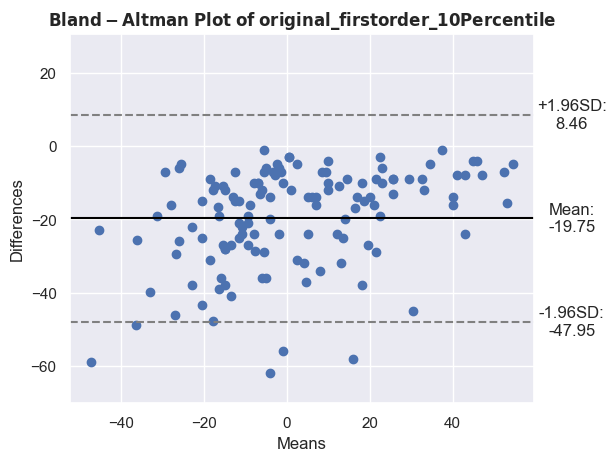

In [49]:
# Calculate metrics for bland-altman
md, sd, mean, CI_low, CI_high = bland_altman_plot(features[feature_to_plot], erodedFeatures[feature_to_plot])

# Redfine feature name with \ infront of _ for formatting
feature_to_plot = "original\_firstorder\_10Percentile"

# Create plot
plt.title(r"$\mathbf{Bland-Altman}$" + " " + r"$\mathbf{Plot}$" + " " + r"$\mathbf{of}$" + " " + r"$\mathbf{"+feature_to_plot+"}$")
plt.xlabel("Means")
plt.ylabel("Differences")
plt.ylim(md - 3.5*sd, md + 3.5*sd)

# How far off the plot do we start writing the text
xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*1.14
# 2 SD below mean
plt.text(xOutPlot, md - 1.96*sd, 
    r'-1.96SD:' + "\n" + "%.2f" % CI_low, 
    ha = "center",
    va = "center",
    )
# 2 SD above mean
plt.text(xOutPlot, md + 1.96*sd, 
    r'+1.96SD:' + "\n" + "%.2f" % CI_high, 
    ha = "center",
    va = "center",
    )
# At the mean
plt.text(xOutPlot, md, 
    r'Mean:' + "\n" + "%.2f" % md, 
    ha = "center",
    va = "center",
    )
plt.subplots_adjust(right=0.85)
sns.set_theme()